In [6]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import get_db_url

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.



In these exercises, you will complete the first step toward the above goal: 
acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips 
 from the zillow database for all 'Single Family Residential' properties.

In [7]:
url = get_db_url('zillow')
query = '''
            
SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM properties_2017
LEFT JOIN propertylandusetype USING(propertylandusetypeid)
WHERE propertylandusedesc IN ("Single Family Residential",                       
                              "Inferred Single Family Residential")'''


In [8]:
df = pd.read_sql(query, url)
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


 Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above.
  You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions
  using markdown and code commenting where helpful

In [9]:
df = df.copy()
df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'square_ft_area',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built',
                          'taxamount': 'tax_amount'})

In [10]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   bedrooms        2152853 non-null  float64
 1   bathrooms       2152853 non-null  float64
 2   square_ft_area  2144379 non-null  float64
 3   tax_value       2152371 non-null  float64
 4   year_built      2143526 non-null  float64
 5   tax_amount      2148422 non-null  float64
 6   fips            2152864 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [11]:
df.isnull().sum()

bedrooms            11
bathrooms           11
square_ft_area    8485
tax_value          493
year_built        9338
tax_amount        4442
fips                 0
dtype: int64

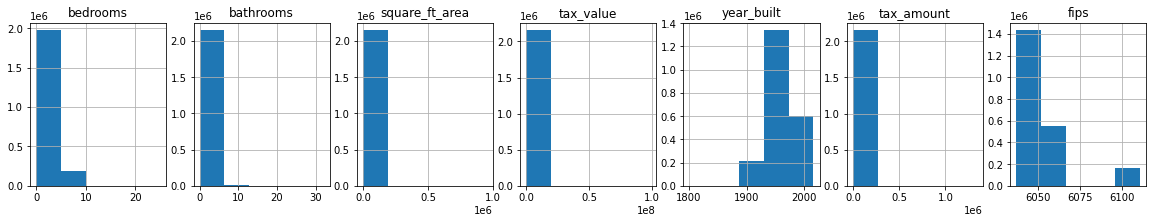

In [12]:
# Visualizing Distribution of Variables
#histograms
plt.figure(figsize=(20, 3))

cols = [col for col in df.columns]

for i, col in enumerate(cols):

    plot_number = i + 1 
    plt.subplot(1,7, plot_number)
    plt.title(col)
    df[col].hist(bins=5)
    #turning off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

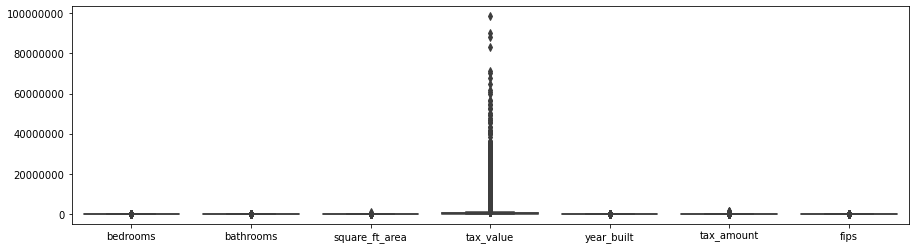

In [13]:
#boxplots
#show outliers
plt.figure(figsize=(15,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df)

plt.show()


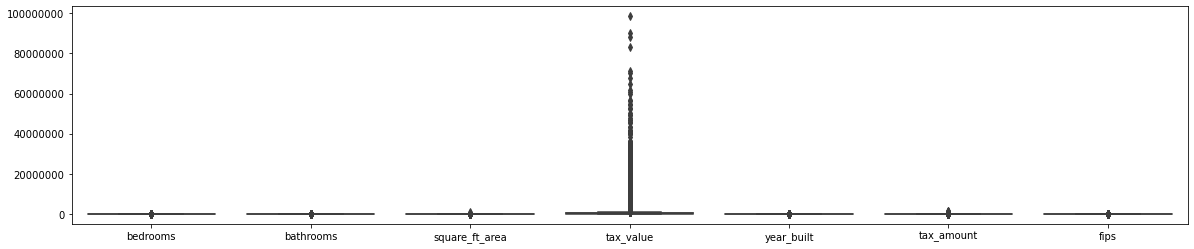

In [14]:
plt.figure(figsize=(20,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df)

plt.show()

# tax_value has a big outlier, making it difficult to observe other variables' outliers.

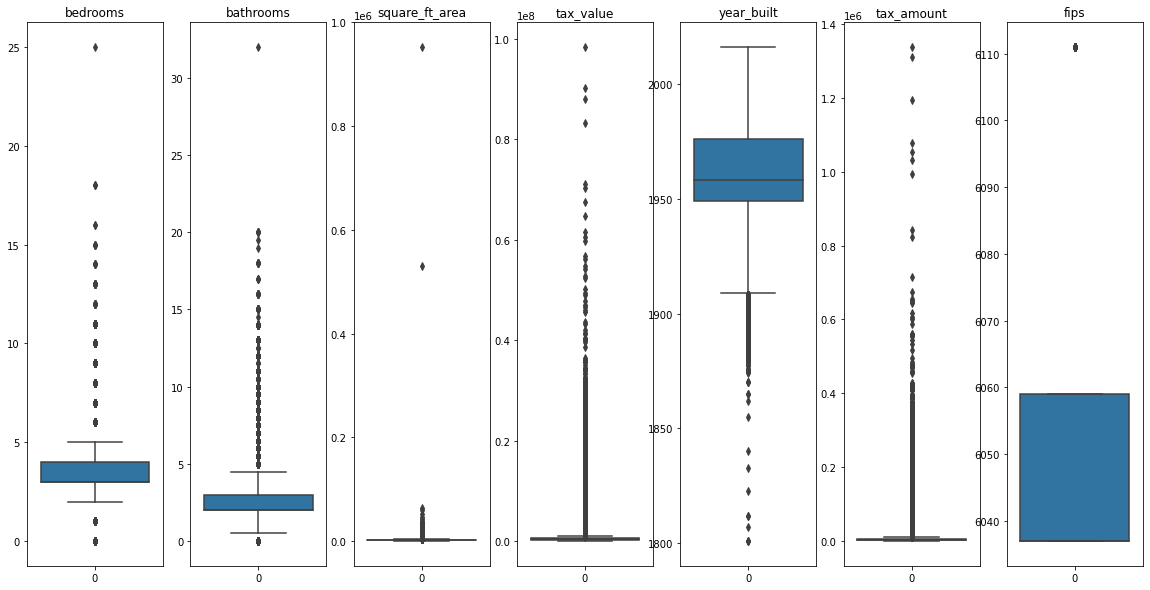

In [15]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns):
    plot_number = i + 1 
    plt.subplot(1, 7, plot_number)
    plt.title(col)
    sns.boxplot(data=df[col])
    plt.grid(False)

plt.show()

In [16]:
def remove_outliers(df, k, col_list):

    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75]) 
        
        iqr = q3 - q1
        
        upper_bound = q3 + k * iqr  
        lower_bound = q1 - k * iqr  

        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [ ]:
#alternative way to remove outliers
def remove_outliers1(df, k, col_list):

    num_obs = df.shape[0]
    df['outlier'] = False
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75]) 
        
        iqr = q3 - q1  
        
        upper_bound = q3 + k * iqr 
        lower_bound = q1 - k * iqr  

        df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    df = df[df.outlier == False]
    df.drop(columns=['outlier'], inplace=True)
    print(f"Number of observations removed: {num_obs - df.shape[0]}")
        
    return df

In [18]:
df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'square_ft_area', 'tax_value', 'tax_amount'])
df

,bedrooms,bathrooms,square_ft_area,tax_value,year_built,tax_amount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
...,...,...,...,...,...,...,...
2152853,3.0,2.0,1917.0,408680.0,1946.0,4341.32,6111.0
2152854,4.0,2.0,1987.0,259913.0,1955.0,3175.66,6059.0
2152856,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


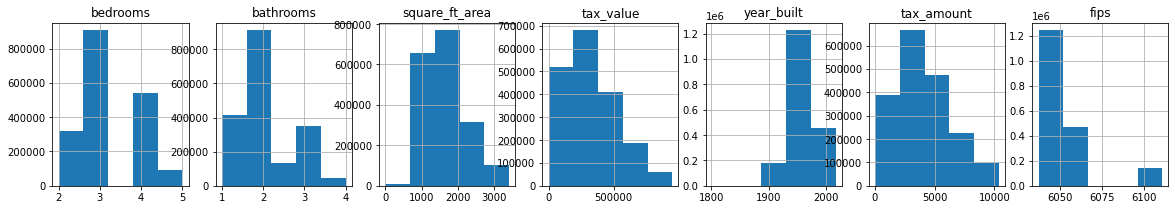

In [19]:
# Visualize the cleaned data
plt.figure(figsize=(20, 3))

cols = [col for col in df.columns]

for i, col in enumerate(cols):

    plot_number = i + 1 
    plt.subplot(1,7, plot_number)
    plt.title(col)
    df[col].hist(bins=5)
    #turning off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

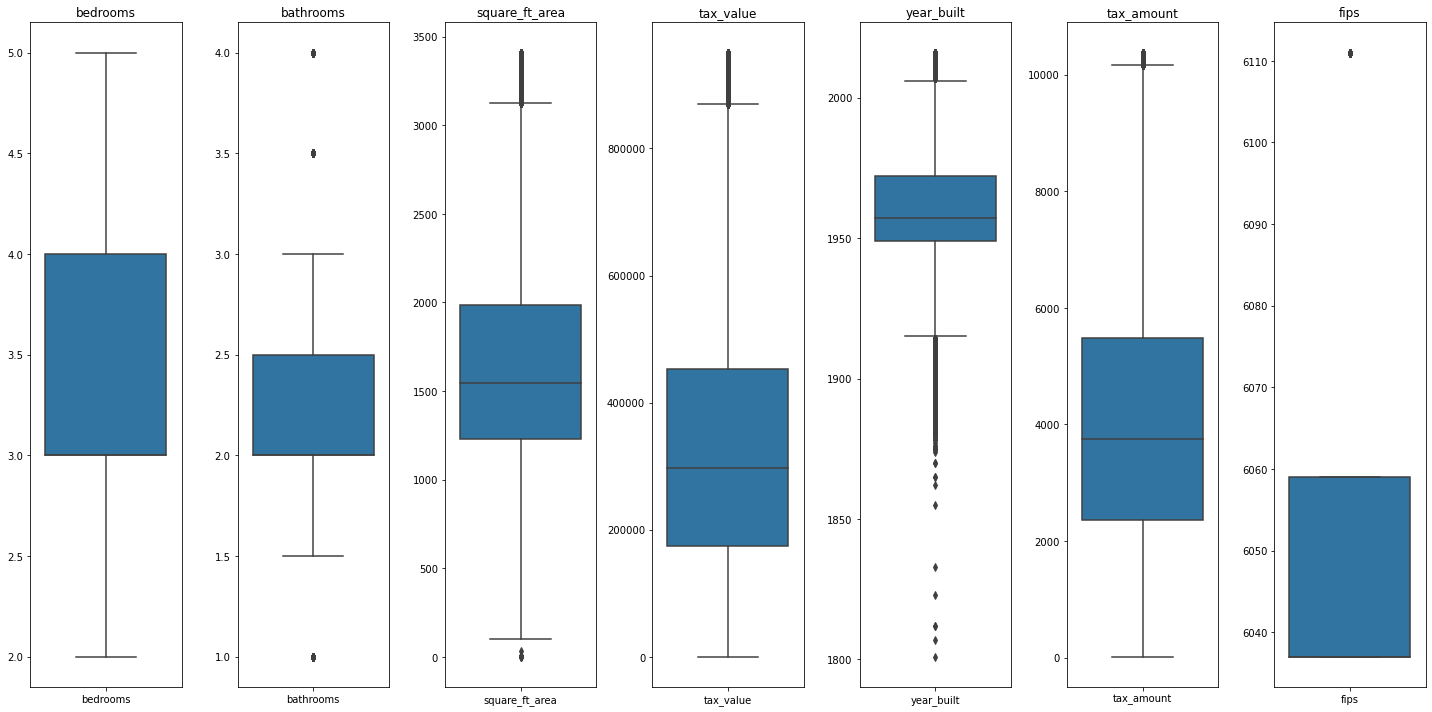

In [27]:
plt.figure(figsize=(20, 10))
cols = [col for col in df.columns]

for i, col in enumerate(cols):
    plot_number = i + 1 
    plt.subplot(1, len(cols), plot_number)
    plt.title(col)
    sns.boxplot(data=df[[col]])
    plt.grid(False)
    plt.tight_layout()

plt.show()

In [29]:
# Null Values
df.isnull().sum()
# year-built has null values.

bedrooms            0
bathrooms           0
square_ft_area      0
tax_value           0
year_built        874
tax_amount          0
fips                0
dtype: int64

In [33]:
df.year_built.value_counts()

1955.0    80451
1950.0    66876
1954.0    65523
1953.0    58746
1956.0    58054
          ...  
1823.0        1
1801.0        1
1807.0        1
1877.0        1
1874.0        1
Name: year_built, Length: 152, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855285 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bedrooms        float64
 1   bathrooms       float64
 2   square_ft_area  float64
 3   tax_value       float64
 4   year_built      float64
 5   tax_amount      float64
 6   fips            float64
dtypes: float64(7)
memory usage: 113.2 MB


In [37]:
# change the data type
cols = df.columns

for col in cols:
    
    print(col.upper())
    print(df[col].value_counts())

BEDROOMS
3.0    905249
4.0    539886
2.0    320685
5.0     89465
Name: bedrooms, dtype: int64
BATHROOMS
2.00    909673
1.00    385962
3.00    352086
2.50    132451
4.00     31976
1.50     30752
3.50     12382
1.75         3
Name: bathrooms, dtype: int64
SQUARE_FT_AREA
1200.0    5091
1080.0    4318
1120.0    4287
1400.0    3776
1440.0    3618
          ... 
179.0        1
489.0        1
447.0        1
32.0         1
507.0        1
Name: square_ft_area, Length: 3015, dtype: int64
TAX_VALUE
450000.0    806
500000.0    754
400000.0    701
430000.0    677
440000.0    671
           ... 
877211.0      1
375555.0      1
340932.0      1
425644.0      1
773358.0      1
Name: tax_value, Length: 457592, dtype: int64
YEAR_BUILT
1955.0    80451
1950.0    66876
1954.0    65523
1953.0    58746
1956.0    58054
          ...  
1823.0        1
1801.0        1
1807.0        1
1877.0        1
1874.0        1
Name: year_built, Length: 152, dtype: int64
TAX_AMOUNT
345.72     164
344.18      71
343.52      6

In [39]:
# turn year built and fips into object as they are categorical variable.
df.fips = df.fips.astype(object)
df.year_built = df.year_built.astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855285 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bedrooms        float64
 1   bathrooms       float64
 2   square_ft_area  float64
 3   tax_value       float64
 4   year_built      object 
 5   tax_amount      float64
 6   fips            object 
dtypes: float64(5), object(2)
memory usage: 113.2+ MB


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [43]:
#impute year-built column's null values
imputer = SimpleImputer(strategy='median')
imputer.fit(train[['year_built']])

train[['year_built']] = imputer.transform(train[['year_built']])
validate[['year_built']] = imputer.transform(validate[['year_built']])
test[['year_built']] = imputer.transform(test[['year_built']])

In [44]:
# null values are gone
train.isnull().sum()

bedrooms          0
bathrooms         0
square_ft_area    0
tax_value         0
year_built        0
tax_amount        0
fips              0
dtype: int64

 Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn 
 no missing values in your wrangle.py file. Name your final function wrangle_zillow.